In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.datasets import load_boston
x = load_boston()
df = pd.DataFrame(x.data, columns = x.feature_names)
df["MEDV"] = x.target
X_df = df.drop("MEDV",1)   #Feature Matrix
y_df = df["MEDV"]          #Target Variable
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
X_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
y_df

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [7]:
from sklearn.feature_selection import mutual_info_classif

In [8]:
df_voter = pd.read_csv('voters.csv', index_col='Unnamed: 0')
df_voter.head()

,race,party,age_group
0,hispanic,democrat,20-30
1,white,independent,40-50
2,black,republican,40-50
3,white,democrat,40-50
4,white,democrat,20-30


In [10]:
df_v = pd.read_csv('voters.csv', index_col='Unnamed: 0')
df_v['race']=df_v['race'].astype('category')
df_v['party']=df_v['party'].astype('category')
df_v['age_group']=df_v['age_group'].astype('category')

df_v['race'] = df_v['race'].cat.codes
df_v['party']=df_v['party'].cat.codes
df_v['age_group']=df_v['age_group'].cat.codes

X = df_v.drop(['party'], axis=1)
y = df_v['party']

In [11]:
importance = mutual_info_classif(X, y, random_state=100)

In [13]:
X.head()

,race,age_group
0,2,0
1,4,2
2,1,2
3,4,2
4,4,0


In [12]:
importance

array([0.16051942, 0.00631776])

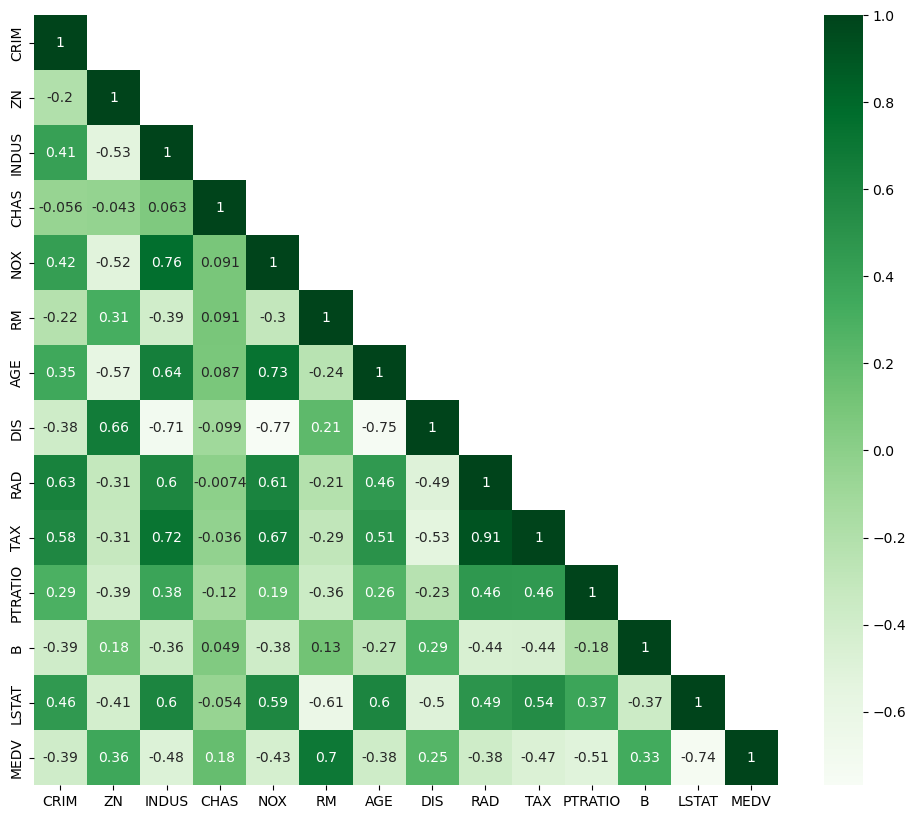

In [15]:
plt.figure(figsize=(12,10))
cor = df.corr()
mask = np.triu(np.ones_like(cor), k=1)
sns.heatmap(cor, annot=True, cmap=plt.cm.Greens, mask=mask)
plt.show()

In [16]:
cor_target = abs(cor["MEDV"])
cor_target

CRIM       0.388305
ZN         0.360445
INDUS      0.483725
CHAS       0.175260
NOX        0.427321
RM         0.695360
AGE        0.376955
DIS        0.249929
RAD        0.381626
TAX        0.468536
PTRATIO    0.507787
B          0.333461
LSTAT      0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

In [17]:
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.4]
relevant_features

INDUS      0.483725
NOX        0.427321
RM         0.695360
TAX        0.468536
PTRATIO    0.507787
LSTAT      0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

In [18]:
from sklearn.feature_selection import VarianceThreshold

In [20]:
v_threshold = VarianceThreshold(threshold=2)
v_threshold.fit(X_df)
v_threshold.get_support()

array([ True,  True,  True, False, False, False,  True,  True,  True,
        True,  True,  True,  True])

In [22]:
X_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [24]:
from sklearn.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
sfs = SFS(estimator=LinearRegression(),
          n_features_to_select=5,
          direction="forward",
          scoring = 'r2')
sfs.fit(X_df, y_df)
sfs.get_feature_names_out() # to get the final set of features.

array(['CRIM', 'CHAS', 'RM', 'PTRATIO', 'LSTAT'], dtype=object)

In [25]:
from sklearn.linear_model import LinearRegression
sfs = SFS(estimator=LinearRegression(),
          n_features_to_select=5,
          direction="backward",
          scoring = 'r2')
sfs.fit(X_df, y_df)
sfs.get_feature_names_out() # to get the final set of features.

array(['NOX', 'DIS', 'RAD', 'PTRATIO', 'LSTAT'], dtype=object)

In [26]:
model = LinearRegression()
model.fit(X_df, y_df)
model.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [27]:
from sklearn.feature_selection import RFE

In [28]:
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model,n_features_to_select=10)
X_rfe = rfe.fit_transform(X_df,y_df)  
#Fitting the data to model
model.fit(X_rfe,y_df)

print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True False  True  True False  True False
  True]
[1 1 1 1 1 1 4 1 1 2 1 3 1]
